In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import os


In [15]:
# List EEG file names (replace with your filenames)
ps_files = sorted(os.listdir(os.path.join(os.getcwd(), 'Datasets', 'Abnormal')))
ng_files = sorted(os.listdir(os.path.join(os.getcwd(), 'Datasets', 'Normal')))

# Load Abnormal and Normal EEG datasets
abnormal_dfs = [pd.read_csv(os.path.join(os.getcwd(), 'Datasets', 'Abnormal', ps_files[i])) for i in range(0, 6)]
normal_dfs   = [pd.read_csv(os.path.join(os.getcwd(), 'Datasets', 'Normal', ng_files[i])) for i in range(0, 4)]

# Concatenate into single training DataFrame
train_df = pd.concat(abnormal_dfs + normal_dfs, ignore_index=True)

# Create labels (1 for abnormal, 0 for normal)
abnormal_labels = np.ones(sum(len(df) for df in abnormal_dfs))
normal_labels = np.zeros(sum(len(df) for df in normal_dfs))

# Combine labels
labels = np.concatenate((abnormal_labels, normal_labels))

# Separate features and labels
X = train_df.values
y = labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels for DNN
y_cat = to_categorical(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)


In [10]:
model = Sequential()
model.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

d:\My Files\MIT bio\SEM V\ICRTB project\EEG_epilepsy\Model\Epilepsy\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79338/79338 ━━━━━━━━━━━━━━━━━━━━ 534s 7ms/step - accuracy: 0.5964 - loss: 0.6747 - val_accuracy: 0.5970 - val_loss: 0.6742


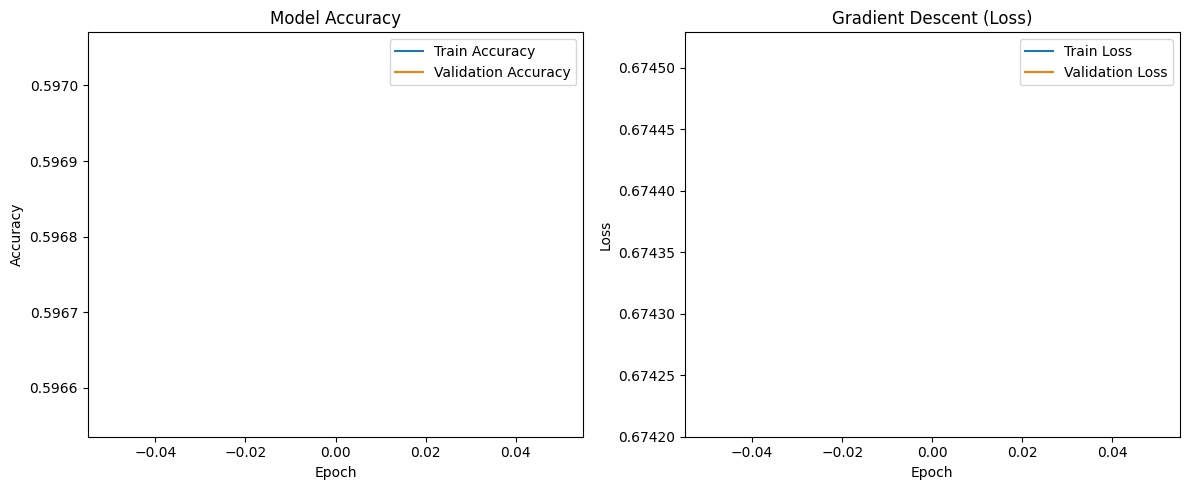

In [11]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss (Gradient Descent) plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Gradient Descent (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(1024245), np.int64(1): np.int64(1514555)}


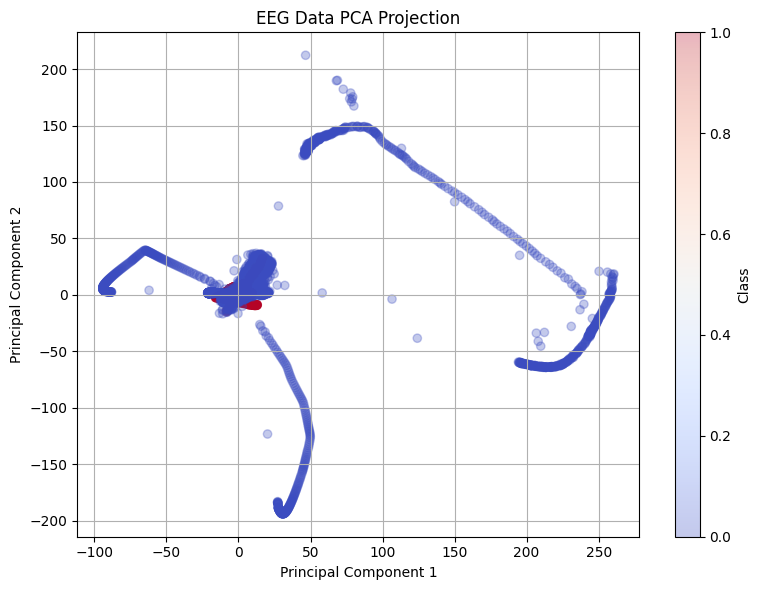

In [19]:
from sklearn.decomposition import PCA

df = pd.DataFrame(X)

valid_rows = ~df.isna().any(axis=1)
df_clean = df[valid_rows]
X_clean = df_clean.values

y = np.array(y)
y_clean = y[valid_rows]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

y_cat = to_categorical(y_clean, num_classes=2)

pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=np.argmax(y_cat, axis=1), cmap='coolwarm', alpha=0.3)
plt.title("EEG Data PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class')
plt.grid(True)
plt.tight_layout()
plt.show()
